### Note: The full code is not shown until the end of the video, some code snippets will throw an error due to missing code, the missing code is found at the end of the video, last 10 minutes or so

https://www.youtube.com/watch?v=mkv5mxYu0Wk

In [1]:
import pandas as pd # import libraries
import numpy as np
import matplotlib as plt
%matplotlib inline # allows for graphs to be shown inline

df = pd.read_csv('loanP_train.csv') # read in dataset

In [2]:
df.head()

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# look at summary of data using describe
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,599.000000,578.000000,585.000000,550.00000
mean,5420.687813,1563.913055,145.434256,342.461538,0.84000
std,6169.168633,2456.618360,84.596463,64.868352,0.36694
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2874.000000,0.000000,100.000000,360.000000,1.00000
50%,3812.000000,1210.000000,126.500000,360.000000,1.00000
75%,5807.500000,2279.000000,165.000000,360.000000,1.00000
max,81000.000000,33837.000000,700.000000,480.000000,1.00000


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Graduate'>

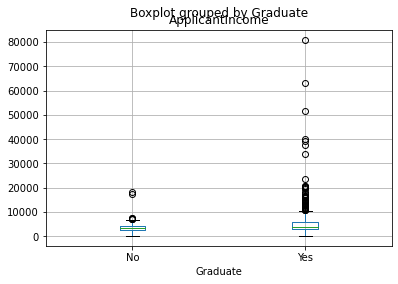

In [28]:
df.boxplot(column='ApplicantIncome', by ='Graduate') # to understand the distribution

<AxesSubplot:>

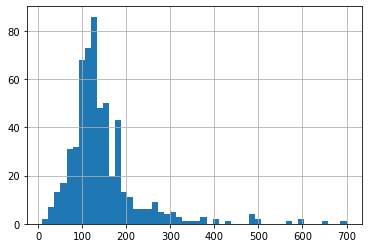

In [4]:
#show distribution of LoanAmount column
df['LoanAmount'].hist(bins=50) # data shows some extreme values, most values are in the 100 range

<AxesSubplot:>

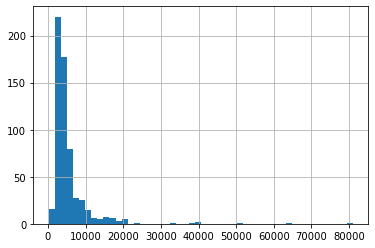

In [6]:
df['ApplicantIncome'].hist(bins=50) # can also see some extreme values well outside most of the range

In [29]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print('\nProbability of getting loan for each Credit History Class:')
print(temp2)

Frequency Table for Credit History:
0.84     49
0.00     88
1.00    462
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History Class:
                Loan_Status
Credit_History             
0.00               0.079545
0.84               0.755102
1.00               0.792208


<AxesSubplot:title={'center':'Applicants by Credit History'}, xlabel='Credit_History', ylabel='Count of Applicants'>

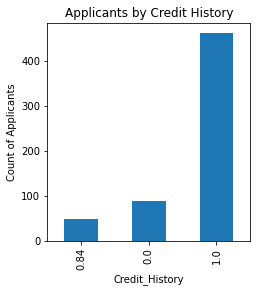

In [30]:
# categorical values distribution using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit History")
temp1.plot(kind='bar') # temp1 throws error early in video b/c full code set hasn't been shown (defined in cell above)

## Data Wrangling

In [8]:
# find missing values in each column using a lambda function
# sum up the number of null values in each column
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# replace missing values with the mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [10]:
df.apply(lambda x: sum(x.isnull()), axis=0) # LoanAmount is no longer missing values

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# view data types for each column
df.dtypes

Loan_ID               object
Gender                object
Marital_Status        object
Dependents            object
Graduate              object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df.apply(lambda x: sum(x.isnull()), axis=0) 

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df.mean(numeric_only=True) # display mean of dataframe, use numeric_only=True to avoid nuisance frame message

ApplicantIncome      5420.687813
CoapplicantIncome    1563.913055
LoanAmount            145.434256
Loan_Amount_Term      342.461538
Credit_History          0.840000
dtype: float64

## Building a Predictive Model in Python

In [17]:
# import models from scikit learn module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [20]:
#extracting only the independent variables
X = df.iloc[:, [8,10]].values # credit history and loan amount

#extracing only the dependent variables
y = df.iloc[:,12].values # loan status

In [22]:
# splitting the dataset into Training set and Test set
# no specific rule, but training set > test set, something like 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
# fitting logistics regresion to training dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0) # create instance of LogisticRegression to classifier
classifier.fit(X_train, y_train) # train the classifier object using fit

LogisticRegression(random_state=0)

In [25]:
# predicting the Test set results
y_pred = classifier.predict(X_test) # pass in the X_test variable, using 25% of data
y_pred

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [26]:
# building the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# confusion matrix is considered most accurate when the sum of the TN and TP is at Maximum value 
# TN FP 
# FN TP
# Accuracy = (TP + TN)/total = (103+18)/150 = 0.8
# Precision = (TP/predicted yes) = 103/130 = 0.79 (predicted yes = FP+TP)

array([[ 18,  27],
       [  2, 103]], dtype=int64)

In [27]:
# calculate accuracy using scikit
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8066666666666666